In [273]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import numpy as np

In [233]:
df = pd.read_csv('C:/Users/cjoly/projet/Net1_CMH/Scenario-506/df_full.csv')
y = pd.read_csv('C:/Users/cjoly/projet/Net1_CMH/Scenario-506/Labels.csv')

In [234]:
df =df.drop(df.columns[0], axis=1)
df


,Node 11,Node 12,Node 13,Node 21,Node 22,Node 23,Node 31,Node 32,Link 10,Link 11,...,Pressure 2,Pressure 10,Pressure 11,Pressure 12,Pressure 13,Pressure 21,Pressure 22,Pressure 23,Pressure 31,Pressure 32
0,18.0,21.6,14.4,21.6,25.2,14.4,14.4,14.4,417.6,18.0,...,36.576,90.960,83.933,82.376,83.821,82.924,83.883,85.348,82.347,78.977
1,18.0,18.0,10.8,21.6,21.6,14.4,14.4,10.8,414.0,18.0,...,37.312,91.552,84.626,83.118,84.592,83.704,84.642,86.118,83.177,79.839
2,14.4,18.0,10.8,18.0,18.0,14.4,14.4,10.8,410.4,14.4,...,38.074,92.190,85.373,83.885,85.367,84.543,85.420,86.896,84.089,80.757
3,14.4,18.0,10.8,18.0,18.0,10.8,10.8,10.8,406.8,14.4,...,38.860,92.841,86.136,84.674,86.173,85.377,86.227,87.708,84.937,81.598
4,14.4,14.4,7.2,14.4,18.0,10.8,14.4,7.2,403.2,14.4,...,39.659,93.473,86.877,85.474,86.978,86.177,87.033,88.512,85.716,82.413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,32.4,36.0,18.0,36.0,46.8,32.4,21.6,25.2,244.8,32.4,...,45.720,115.912,113.291,115.172,115.984,113.958,115.485,116.993,112.842,109.367
17516,25.2,28.8,21.6,28.8,43.2,28.8,21.6,21.6,223.2,25.2,...,45.720,117.959,115.719,117.753,118.577,116.643,118.169,119.677,115.563,112.170
17517,25.2,28.8,18.0,32.4,36.0,25.2,21.6,18.0,212.4,25.2,...,45.720,119.255,117.259,119.409,120.338,118.449,119.985,121.497,117.493,114.230
17518,25.2,28.8,18.0,25.2,32.4,25.2,18.0,18.0,190.8,25.2,...,45.720,120.973,119.305,121.615,122.657,120.882,122.407,123.918,120.128,116.825


In [235]:
scaler = StandardScaler()
np_scaled = scaler.fit_transform(df)
df = pd.DataFrame(np_scaled)

In [236]:
time = pd.read_csv('C:/Users/cjoly/projet/Net1_CMH/Scenario-506/Timestamps.csv')

In [237]:
time

,Index,Timestamp
0,1,2017-01-01 00:00:00
1,2,2017-01-01 00:30:00
2,3,2017-01-01 01:00:00
3,4,2017-01-01 01:30:00
4,5,2017-01-01 02:00:00
...,...,...
17515,17516,2017-12-31 21:30:00
17516,17517,2017-12-31 22:00:00
17517,17518,2017-12-31 22:30:00
17518,17519,2017-12-31 23:00:00


In [238]:
df.insert(0,"timestamp" , pd.to_datetime(time['Timestamp']))

In [239]:
df

,timestamp,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28
0,2017-01-01 00:00:00,-0.560490,-0.526682,-0.544234,-0.630633,-0.749833,-1.209619,-0.682070,-0.330623,2.496613,...,-0.632781,0.193668,0.100089,0.028577,0.039020,0.058613,0.047336,0.046539,0.065293,0.064696
1,2017-01-01 00:30:00,-0.560490,-0.852212,-1.069693,-0.630633,-0.991567,-1.209619,-0.682070,-0.685861,2.455159,...,-0.528035,0.205012,0.113570,0.043103,0.054173,0.073984,0.062291,0.061711,0.081771,0.081859
2,2017-01-01 01:00:00,-0.840344,-0.852212,-1.069693,-0.942734,-1.233302,-1.209619,-0.682070,-0.685861,2.413705,...,-0.419590,0.217237,0.128102,0.058118,0.069403,0.090517,0.077621,0.077040,0.099877,0.100137
3,2017-01-01 01:30:00,-0.840344,-0.852212,-1.069693,-0.942734,-1.233302,-1.555258,-1.127910,-0.685861,2.372251,...,-0.307728,0.229711,0.142945,0.073564,0.085243,0.106951,0.093522,0.093039,0.116712,0.116882
4,2017-01-01 02:00:00,-0.840344,-1.177741,-1.595152,-1.254836,-1.233302,-1.555258,-0.682070,-1.041099,2.330797,...,-0.194017,0.241821,0.157360,0.089225,0.101063,0.122716,0.109403,0.108881,0.132178,0.133109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2017-12-31 21:30:00,0.558925,0.775437,-0.018775,0.617772,0.700575,0.518577,0.209611,0.735091,0.506820,...,0.668568,0.671786,0.671209,0.670600,0.671104,0.670160,0.670014,0.670054,0.670710,0.669781
17516,2017-12-31 22:00:00,-0.000783,0.124378,0.506684,-0.006431,0.458840,0.172938,0.209611,0.379853,0.258096,...,0.668568,0.711009,0.718443,0.721126,0.722063,0.723070,0.722899,0.722938,0.724730,0.725591
17517,2017-12-31 22:30:00,-0.000783,0.124378,-0.018775,0.305670,-0.024629,-0.172701,0.209611,0.024615,0.133734,...,0.668568,0.735842,0.748401,0.753544,0.756671,0.758658,0.758681,0.758799,0.763046,0.766606
17518,2017-12-31 23:00:00,-0.000783,0.124378,-0.018775,-0.318532,-0.266363,-0.172701,-0.236229,0.024615,-0.114990,...,0.668568,0.768762,0.788204,0.796729,0.802245,0.806602,0.806403,0.806501,0.815359,0.818275


In [241]:
columns=["timestamp",'Node 11','Node 12','Node 13','Node 21','Node 22','Node 23','Node 31','Node 32','Link 10','Link 11','Link 12','Link 21','Link 22','Link 31','Link 111','Link 112','Link 113','Link 121','Link 122','Pressure 2','Pressure 10','Pressure 11','Pressure 12','Pressure 13','Pressure 21','Pressure 22','Pressure 23','Pressure 31','Pressure 32']


In [268]:
col=['Node 11','Node 12','Node 13','Node 21','Node 22','Node 23','Node 31','Node 32','Link 10','Link 11','Link 12','Link 21','Link 22','Link 31','Link 111','Link 112','Link 113','Link 121','Link 122','Pressure 2','Pressure 10','Pressure 11','Pressure 12','Pressure 13','Pressure 21','Pressure 22','Pressure 23','Pressure 31','Pressure 32']


In [243]:
df.columns=columns

In [244]:
df=df.set_index('timestamp').resample("H").mean().reset_index()

In [245]:
df

,timestamp,Node 11,Node 12,Node 13,Node 21,Node 22,Node 23,Node 31,Node 32,Link 10,...,Pressure 2,Pressure 10,Pressure 11,Pressure 12,Pressure 13,Pressure 21,Pressure 22,Pressure 23,Pressure 31,Pressure 32
0,2017-01-01 00:00:00,-0.560490,-0.689447,-0.806963,-0.630633,-0.870700,-1.209619,-0.682070,-0.508242,2.475886,...,-0.580408,0.199340,0.106829,0.035840,0.046596,0.066298,0.054814,0.054125,0.073532,0.073278
1,2017-01-01 01:00:00,-0.840344,-0.852212,-1.069693,-0.942734,-1.233302,-1.382439,-0.904990,-0.685861,2.392978,...,-0.363659,0.223474,0.135523,0.065841,0.077323,0.098734,0.085571,0.085040,0.108295,0.108509
2,2017-01-01 02:00:00,-0.980271,-1.177741,-1.332422,-1.254836,-1.354169,-1.555258,-0.904990,-1.041099,2.310070,...,-0.136734,0.248230,0.164976,0.097124,0.109062,0.131032,0.117580,0.117018,0.141022,0.141661
3,2017-01-01 03:00:00,-0.980271,-1.177741,-1.332422,-1.098785,-1.354169,-1.382439,-1.127910,-1.041099,2.227162,...,0.093393,0.272211,0.193515,0.128700,0.140761,0.162373,0.149274,0.148751,0.173492,0.173727
4,2017-01-01 04:00:00,-0.840344,-0.852212,-1.069693,-0.942734,-1.233302,-1.382439,-0.904990,-0.863480,2.144254,...,0.315621,0.293902,0.219349,0.159043,0.170722,0.190700,0.179194,0.178631,0.201078,0.202538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2017-12-31 19:00:00,0.838779,0.287143,0.506684,0.773822,0.579708,0.345758,0.655452,0.735091,0.569001,...,0.668568,0.659302,0.656210,0.655115,0.653849,0.652661,0.652734,0.652804,0.650291,0.649422
8756,2017-12-31 20:00:00,0.558925,0.449907,0.506684,0.617772,0.579708,0.518577,0.655452,0.735091,0.527547,...,0.668568,0.664935,0.662990,0.661732,0.660600,0.660169,0.660132,0.660163,0.658193,0.655863
8757,2017-12-31 21:00:00,0.558925,0.612672,0.243955,0.617772,0.579708,0.345758,0.432532,0.735091,0.506820,...,0.668568,0.671278,0.670606,0.670061,0.670092,0.669647,0.669590,0.669650,0.669340,0.668019
8758,2017-12-31 22:00:00,-0.000783,0.124378,0.243955,0.149620,0.217106,0.000118,0.209611,0.202234,0.195915,...,0.668568,0.723426,0.733422,0.737335,0.739367,0.740864,0.740790,0.740869,0.743888,0.746099


In [246]:
x=df.timestamp.dt.hour

In [247]:
df.insert(1,"hour" , x)

In [248]:
df


,timestamp,hour,Node 11,Node 12,Node 13,Node 21,Node 22,Node 23,Node 31,Node 32,...,Pressure 2,Pressure 10,Pressure 11,Pressure 12,Pressure 13,Pressure 21,Pressure 22,Pressure 23,Pressure 31,Pressure 32
0,2017-01-01 00:00:00,0,-0.560490,-0.689447,-0.806963,-0.630633,-0.870700,-1.209619,-0.682070,-0.508242,...,-0.580408,0.199340,0.106829,0.035840,0.046596,0.066298,0.054814,0.054125,0.073532,0.073278
1,2017-01-01 01:00:00,1,-0.840344,-0.852212,-1.069693,-0.942734,-1.233302,-1.382439,-0.904990,-0.685861,...,-0.363659,0.223474,0.135523,0.065841,0.077323,0.098734,0.085571,0.085040,0.108295,0.108509
2,2017-01-01 02:00:00,2,-0.980271,-1.177741,-1.332422,-1.254836,-1.354169,-1.555258,-0.904990,-1.041099,...,-0.136734,0.248230,0.164976,0.097124,0.109062,0.131032,0.117580,0.117018,0.141022,0.141661
3,2017-01-01 03:00:00,3,-0.980271,-1.177741,-1.332422,-1.098785,-1.354169,-1.382439,-1.127910,-1.041099,...,0.093393,0.272211,0.193515,0.128700,0.140761,0.162373,0.149274,0.148751,0.173492,0.173727
4,2017-01-01 04:00:00,4,-0.840344,-0.852212,-1.069693,-0.942734,-1.233302,-1.382439,-0.904990,-0.863480,...,0.315621,0.293902,0.219349,0.159043,0.170722,0.190700,0.179194,0.178631,0.201078,0.202538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2017-12-31 19:00:00,19,0.838779,0.287143,0.506684,0.773822,0.579708,0.345758,0.655452,0.735091,...,0.668568,0.659302,0.656210,0.655115,0.653849,0.652661,0.652734,0.652804,0.650291,0.649422
8756,2017-12-31 20:00:00,20,0.558925,0.449907,0.506684,0.617772,0.579708,0.518577,0.655452,0.735091,...,0.668568,0.664935,0.662990,0.661732,0.660600,0.660169,0.660132,0.660163,0.658193,0.655863
8757,2017-12-31 21:00:00,21,0.558925,0.612672,0.243955,0.617772,0.579708,0.345758,0.432532,0.735091,...,0.668568,0.671278,0.670606,0.670061,0.670092,0.669647,0.669590,0.669650,0.669340,0.668019
8758,2017-12-31 22:00:00,22,-0.000783,0.124378,0.243955,0.149620,0.217106,0.000118,0.209611,0.202234,...,0.668568,0.723426,0.733422,0.737335,0.739367,0.740864,0.740790,0.740869,0.743888,0.746099


In [249]:
df.insert(1,"day" ,pd.Categorical(df.timestamp.dt.strftime('%A'), categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True))

In [250]:
df

,timestamp,day,hour,Node 11,Node 12,Node 13,Node 21,Node 22,Node 23,Node 31,...,Pressure 2,Pressure 10,Pressure 11,Pressure 12,Pressure 13,Pressure 21,Pressure 22,Pressure 23,Pressure 31,Pressure 32
0,2017-01-01 00:00:00,Sunday,0,-0.560490,-0.689447,-0.806963,-0.630633,-0.870700,-1.209619,-0.682070,...,-0.580408,0.199340,0.106829,0.035840,0.046596,0.066298,0.054814,0.054125,0.073532,0.073278
1,2017-01-01 01:00:00,Sunday,1,-0.840344,-0.852212,-1.069693,-0.942734,-1.233302,-1.382439,-0.904990,...,-0.363659,0.223474,0.135523,0.065841,0.077323,0.098734,0.085571,0.085040,0.108295,0.108509
2,2017-01-01 02:00:00,Sunday,2,-0.980271,-1.177741,-1.332422,-1.254836,-1.354169,-1.555258,-0.904990,...,-0.136734,0.248230,0.164976,0.097124,0.109062,0.131032,0.117580,0.117018,0.141022,0.141661
3,2017-01-01 03:00:00,Sunday,3,-0.980271,-1.177741,-1.332422,-1.098785,-1.354169,-1.382439,-1.127910,...,0.093393,0.272211,0.193515,0.128700,0.140761,0.162373,0.149274,0.148751,0.173492,0.173727
4,2017-01-01 04:00:00,Sunday,4,-0.840344,-0.852212,-1.069693,-0.942734,-1.233302,-1.382439,-0.904990,...,0.315621,0.293902,0.219349,0.159043,0.170722,0.190700,0.179194,0.178631,0.201078,0.202538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2017-12-31 19:00:00,Sunday,19,0.838779,0.287143,0.506684,0.773822,0.579708,0.345758,0.655452,...,0.668568,0.659302,0.656210,0.655115,0.653849,0.652661,0.652734,0.652804,0.650291,0.649422
8756,2017-12-31 20:00:00,Sunday,20,0.558925,0.449907,0.506684,0.617772,0.579708,0.518577,0.655452,...,0.668568,0.664935,0.662990,0.661732,0.660600,0.660169,0.660132,0.660163,0.658193,0.655863
8757,2017-12-31 21:00:00,Sunday,21,0.558925,0.612672,0.243955,0.617772,0.579708,0.345758,0.432532,...,0.668568,0.671278,0.670606,0.670061,0.670092,0.669647,0.669590,0.669650,0.669340,0.668019
8758,2017-12-31 22:00:00,Sunday,22,-0.000783,0.124378,0.243955,0.149620,0.217106,0.000118,0.209611,...,0.668568,0.723426,0.733422,0.737335,0.739367,0.740864,0.740790,0.740869,0.743888,0.746099


In [251]:
df.to_csv('C:/Users/cjoly/projet/Net1_CMH/Scenario-506/data.csv')

In [252]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates

In [253]:
data = pd.read_csv('C:/Users/cjoly/projet/Net1_CMH/Scenario-506/data.csv', parse_dates=['timestamp'], index_col='timestamp')

In [254]:
data

,Unnamed: 0,day,hour,Node 11,Node 12,Node 13,Node 21,Node 22,Node 23,Node 31,...,Pressure 2,Pressure 10,Pressure 11,Pressure 12,Pressure 13,Pressure 21,Pressure 22,Pressure 23,Pressure 31,Pressure 32
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,0,Sunday,0,-0.560490,-0.689447,-0.806963,-0.630633,-0.870700,-1.209619,-0.682070,...,-0.580408,0.199340,0.106829,0.035840,0.046596,0.066298,0.054814,0.054125,0.073532,0.073278
2017-01-01 01:00:00,1,Sunday,1,-0.840344,-0.852212,-1.069693,-0.942734,-1.233302,-1.382439,-0.904990,...,-0.363659,0.223474,0.135523,0.065841,0.077323,0.098734,0.085571,0.085040,0.108295,0.108509
2017-01-01 02:00:00,2,Sunday,2,-0.980271,-1.177741,-1.332422,-1.254836,-1.354169,-1.555258,-0.904990,...,-0.136734,0.248230,0.164976,0.097124,0.109062,0.131032,0.117580,0.117018,0.141022,0.141661
2017-01-01 03:00:00,3,Sunday,3,-0.980271,-1.177741,-1.332422,-1.098785,-1.354169,-1.382439,-1.127910,...,0.093393,0.272211,0.193515,0.128700,0.140761,0.162373,0.149274,0.148751,0.173492,0.173727
2017-01-01 04:00:00,4,Sunday,4,-0.840344,-0.852212,-1.069693,-0.942734,-1.233302,-1.382439,-0.904990,...,0.315621,0.293902,0.219349,0.159043,0.170722,0.190700,0.179194,0.178631,0.201078,0.202538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 19:00:00,8755,Sunday,19,0.838779,0.287143,0.506684,0.773822,0.579708,0.345758,0.655452,...,0.668568,0.659302,0.656210,0.655115,0.653849,0.652661,0.652734,0.652804,0.650291,0.649422
2017-12-31 20:00:00,8756,Sunday,20,0.558925,0.449907,0.506684,0.617772,0.579708,0.518577,0.655452,...,0.668568,0.664935,0.662990,0.661732,0.660600,0.660169,0.660132,0.660163,0.658193,0.655863
2017-12-31 21:00:00,8757,Sunday,21,0.558925,0.612672,0.243955,0.617772,0.579708,0.345758,0.432532,...,0.668568,0.671278,0.670606,0.670061,0.670092,0.669647,0.669590,0.669650,0.669340,0.668019


Seasonal-trend decomposition procedure based on LOESS. This technique gives you the ability to split your time series signal into three parts: seasonal, trend, and residue.

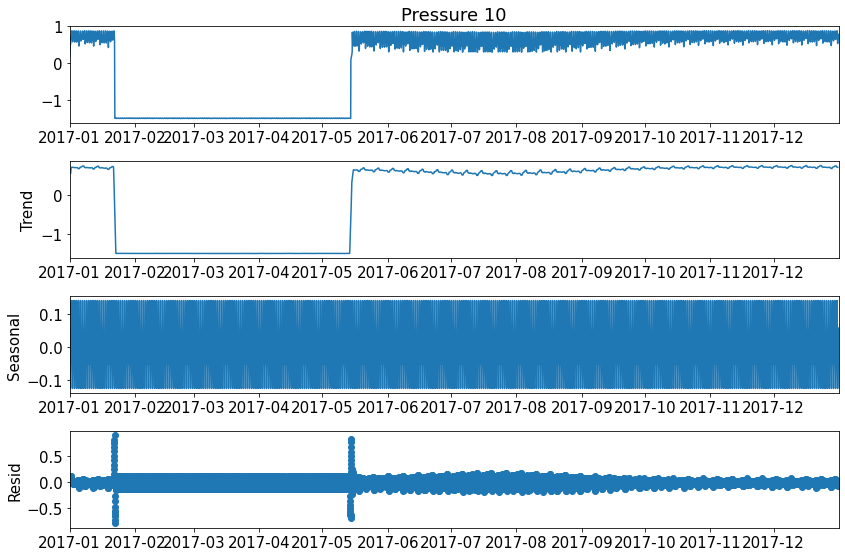

In [255]:
plt.rc('figure',figsize=(12,8))
plt.rc('font',size=15)

result = seasonal_decompose(data['Pressure 10'],model='additive')
fig = result.plot()


In [256]:
fig = px.line(df.reset_index(), x='timestamp', y='Node 11', title='Node 11')
fig.update_xaxes(
    rangeslider_visible=True,
)
fig.show()

Isolation forest

In [257]:
model =  IsolationForest(contamination=0.3)

In [258]:
model.fit(df[col])

IsolationForest(contamination=0.3)

In [259]:
df['label']=pd.Series(model.predict(df[col])).apply(lambda x: 'yes' if (x == -1) else 'no' )

In [260]:
fig = px.scatter(df.reset_index(), x='timestamp', y='Link 11', color='label', hover_data=['day'], title='Leak')
fig.update_xaxes(
    rangeslider_visible=True,
)
fig.show()

autoencoder

Kmeans

In [271]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

Nombre de cluster

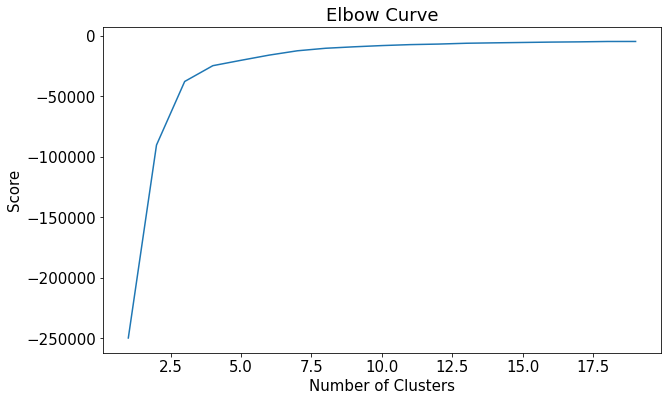

In [269]:
data = df[col]
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

C:\Users\cjoly\AppData\Local\Temp\ipykernel_18292\750127874.py:9: MatplotlibDeprecationWarning:

Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.

C:\Users\cjoly\AppData\Local\Temp\ipykernel_18292\750127874.py:11: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



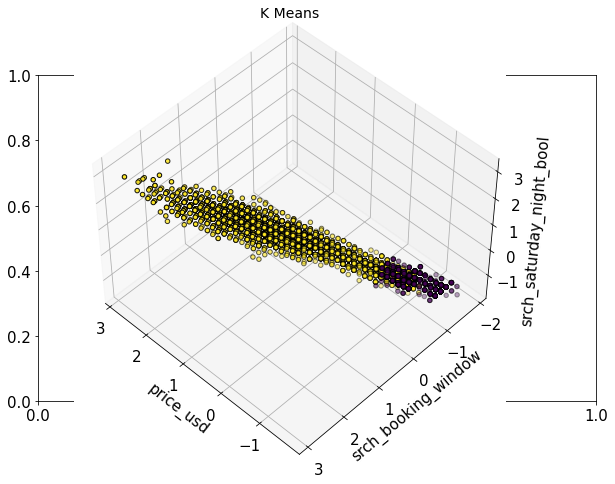

In [300]:
X = df[col]
X = X.reset_index(drop=True)
km = KMeans(n_clusters=2)
km.fit(X)
km.predict(X)
labels = km.labels_
# #Plotting
fig,ax = plt.subplots(figsize=(10,6))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2],
          c=labels.astype(np.float), edgecolor="k")
ax.set_xlabel("price_usd")
ax.set_ylabel("srch_booking_window")
ax.set_zlabel("srch_saturday_night_bool")
plt.title("K Means", fontsize=14);

nombre features à garder

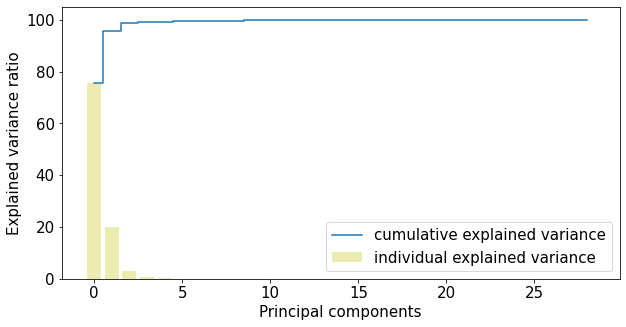

In [301]:
X = data.values
X_std = StandardScaler().fit_transform(X)
#Calculating Eigenvecors and eigenvalues of Covariance matrix
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key = lambda x: x[0], reverse= True)
# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance
plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3, align='center', label='individual explained variance', color = 'y')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [281]:
data

,Node 11,Node 12,Node 13,Node 21,Node 22,Node 23,Node 31,Node 32,Link 10,Link 11,...,Pressure 2,Pressure 10,Pressure 11,Pressure 12,Pressure 13,Pressure 21,Pressure 22,Pressure 23,Pressure 31,Pressure 32
0,-0.560490,-0.689447,-0.806963,-0.630633,-0.870700,-1.209619,-0.682070,-0.508242,2.475886,-0.560490,...,-0.580408,0.199340,0.106829,0.035840,0.046596,0.066298,0.054814,0.054125,0.073532,0.073278
1,-0.840344,-0.852212,-1.069693,-0.942734,-1.233302,-1.382439,-0.904990,-0.685861,2.392978,-0.840344,...,-0.363659,0.223474,0.135523,0.065841,0.077323,0.098734,0.085571,0.085040,0.108295,0.108509
2,-0.980271,-1.177741,-1.332422,-1.254836,-1.354169,-1.555258,-0.904990,-1.041099,2.310070,-0.980271,...,-0.136734,0.248230,0.164976,0.097124,0.109062,0.131032,0.117580,0.117018,0.141022,0.141661
3,-0.980271,-1.177741,-1.332422,-1.098785,-1.354169,-1.382439,-1.127910,-1.041099,2.227162,-0.980271,...,0.093393,0.272211,0.193515,0.128700,0.140761,0.162373,0.149274,0.148751,0.173492,0.173727
4,-0.840344,-0.852212,-1.069693,-0.942734,-1.233302,-1.382439,-0.904990,-0.863480,2.144254,-0.840344,...,0.315621,0.293902,0.219349,0.159043,0.170722,0.190700,0.179194,0.178631,0.201078,0.202538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0.838779,0.287143,0.506684,0.773822,0.579708,0.345758,0.655452,0.735091,0.569001,0.838779,...,0.668568,0.659302,0.656210,0.655115,0.653849,0.652661,0.652734,0.652804,0.650291,0.649422
8756,0.558925,0.449907,0.506684,0.617772,0.579708,0.518577,0.655452,0.735091,0.527547,0.558925,...,0.668568,0.664935,0.662990,0.661732,0.660600,0.660169,0.660132,0.660163,0.658193,0.655863
8757,0.558925,0.612672,0.243955,0.617772,0.579708,0.345758,0.432532,0.735091,0.506820,0.558925,...,0.668568,0.671278,0.670606,0.670061,0.670092,0.669647,0.669590,0.669650,0.669340,0.668019
8758,-0.000783,0.124378,0.243955,0.149620,0.217106,0.000118,0.209611,0.202234,0.195915,-0.000783,...,0.668568,0.723426,0.733422,0.737335,0.739367,0.740864,0.740790,0.740869,0.743888,0.746099


In [302]:
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
df['cluster'] = kmeans[-1].predict(data)
df.index = data.index
df['principal_feature1'] = data['Node 11']
df['principal_feature2'] = data['Node 12']
df['cluster'].value_counts()

13    1001
1      975
2      891
4      770
3      732
12     556
9      541
6      524
7      507
18     495
0      436
15     424
16     366
17     280
10     236
14      14
8        9
5        2
11       1
Name: cluster, dtype: int64

C:\Users\cjoly\AppData\Local\Temp\ipykernel_18292\3270307751.py:2: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



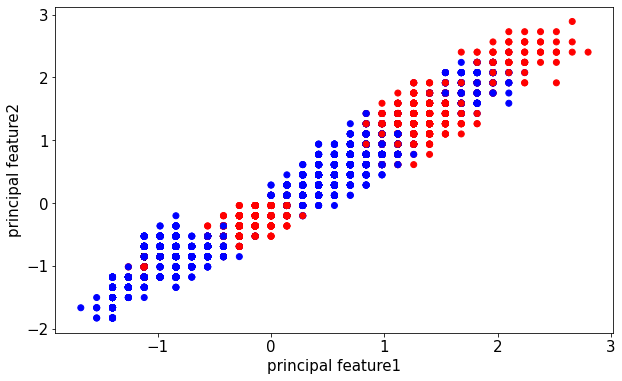

In [303]:
def getDistanceByPoint(data, model):
   distance = pd.Series()
   for i in range(0,len(data)):
       Xa = np.array(data.loc[i])
       Xb = model.cluster_centers_[model.labels_[i]-1]
       distance.at[i]=np.linalg.norm(Xa-Xb)
   return distance
outliers_fraction = 0.3
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(data, kmeans[9])
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()
# anomaly1 contain the anomaly result of the above method Cluster (0:normal, 1:anomaly)
df['anomaly1'] = (distance >= threshold).astype(int)
fig, ax = plt.subplots(figsize=(10,6))
colors = {0:'blue', 1:'red'}
ax.scatter(df['principal_feature1'], df['principal_feature2'], c=df["anomaly1"].apply(lambda x: colors[x]))
plt.xlabel('principal feature1')
plt.ylabel('principal feature2')
plt.show()

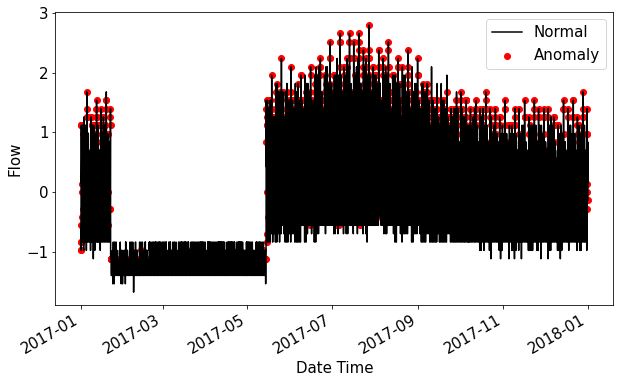

In [304]:
df = df.sort_values('timestamp')
fig, ax = plt.subplots(figsize=(10,6))
a = df.loc[df['anomaly1'] == 1, ['timestamp', 'Node 11']] #anomaly
ax.plot(pd.to_datetime(df['timestamp']), df['Node 11'], color='k',label='Normal')
ax.scatter(pd.to_datetime(a['timestamp']),a['Node 11'], color='red', label='Anomaly')
ax.xaxis_date()
plt.xlabel('Date Time')
plt.ylabel('Flow')
plt.legend()
fig.autofmt_xdate()
plt.show()

autoencoder